In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
import plotly.graph_objs as go
import seaborn as sns

In [2]:
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'CSCO', 'TSLA', 'NVDA', 'JPM', 'GS', 'NFLX']

start_date = pd.Timestamp.now() - pd.DateOffset(months=3)
end_date = pd.Timestamp.now()

prices = yf.download(stocks, start=start_date, end=end_date)['Adj Close']


c:\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.Timed

In [3]:
prices

Ticker,AAPL,AMZN,CSCO,GOOGL,GS,JPM,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2024-03-11,172.516006,171.960007,49.813030,137.669998,383.837158,187.198044,403.791656,600.929993,857.739990,177.770004
2024-03-12,172.995346,175.389999,49.664246,138.500000,385.845001,188.739059,414.532288,611.080017,919.130005,177.539993
2024-03-13,170.898209,176.559998,49.703922,139.789993,389.950165,190.270142,414.352631,609.450012,908.880005,169.479996
2024-03-14,172.765671,178.750000,49.386517,143.100006,386.272400,186.879913,424.454407,613.010010,879.440002,162.500000
2024-03-15,172.386185,174.419998,48.533485,141.179993,384.880829,189.196396,415.670258,605.880005,878.369995,163.570007
...,...,...,...,...,...,...,...,...,...,...
2024-06-03,194.029999,178.339996,46.650002,173.169998,454.980011,201.820007,413.519989,633.789978,1150.000000,176.289993
2024-06-04,194.350006,179.339996,47.419998,173.789993,455.299988,199.160004,416.070007,631.619995,1164.369995,174.770004
2024-06-05,195.869995,181.279999,46.020000,175.410004,461.679993,197.259995,424.010010,650.270020,1224.400024,175.000000


In [4]:
returns = prices.pct_change().dropna()
returns.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,GS,JPM,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2024-03-12,0.002779,0.019946,-0.002987,0.006029,0.005231,0.008232,0.026599,0.016891,0.071572,-0.001294
2024-03-13,-0.012123,0.006671,0.000799,0.009314,0.010639,0.008112,-0.000433,-0.002667,-0.011152,-0.045398
2024-03-14,0.010927,0.012404,-0.006386,0.023678,-0.009431,-0.017818,0.024380,0.005841,-0.032392,-0.041185
2024-03-15,-0.002197,-0.024224,-0.017273,-0.013417,-0.003603,0.012396,-0.020695,-0.011631,-0.001217,0.006585
2024-03-18,0.006372,0.000344,0.006949,0.046041,-0.007334,0.012401,0.002161,0.020648,0.007036,0.062542


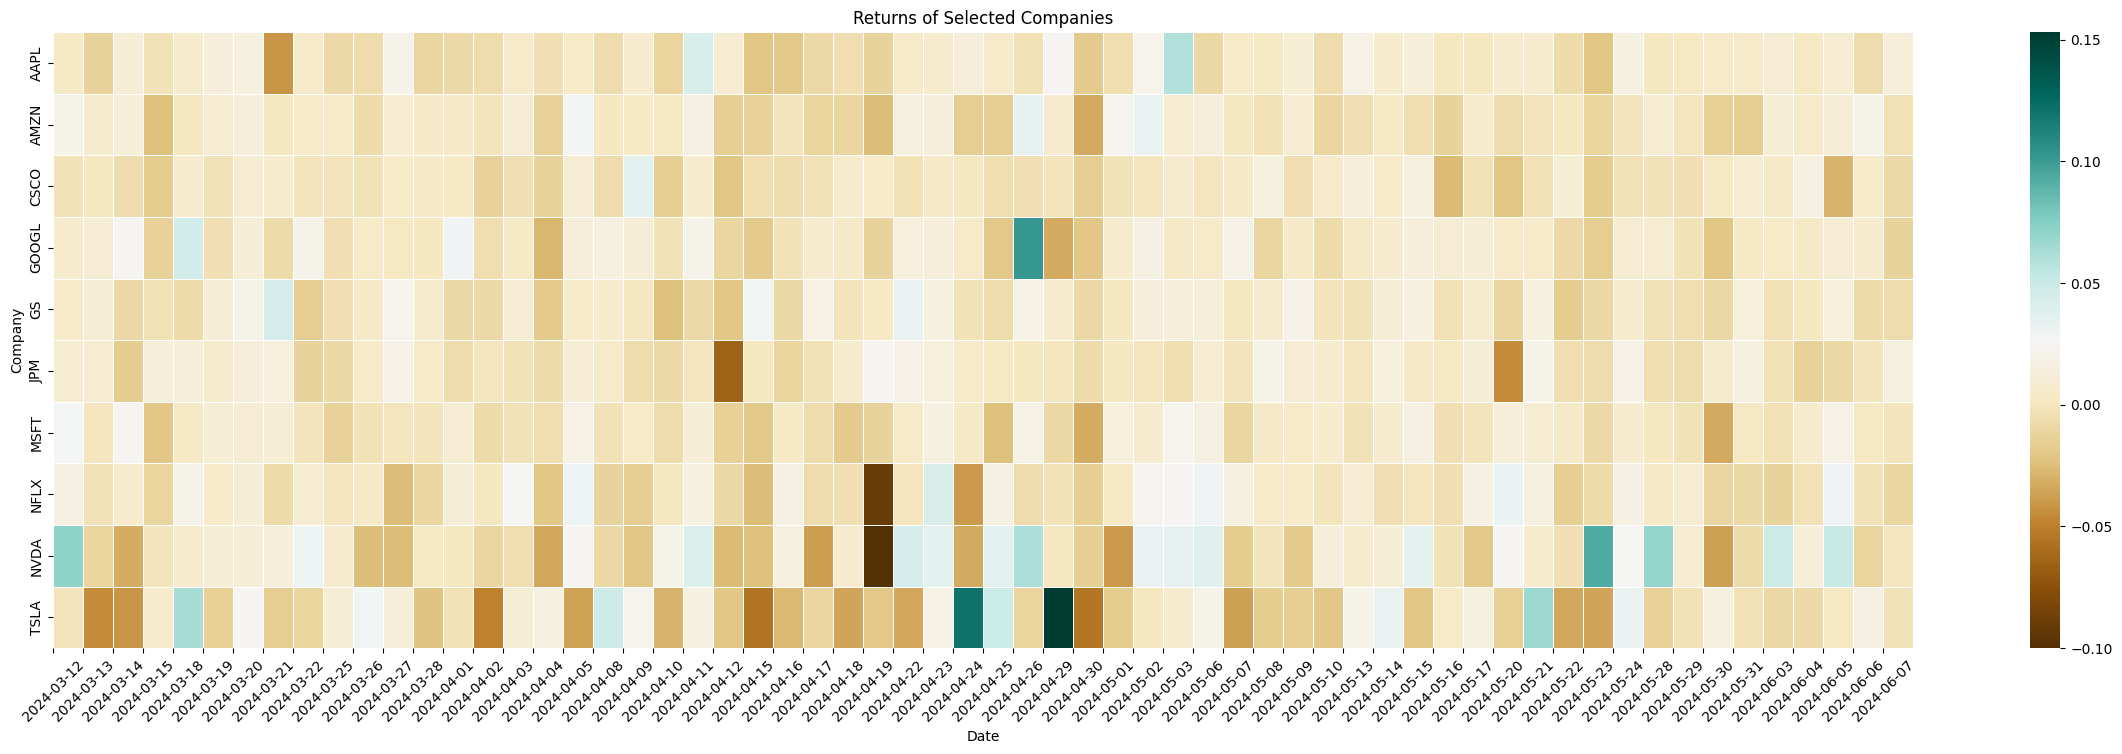

In [5]:
returns_transposed = returns.transpose()

# Set x-axis ticks to show only dates
dates = returns.index.date

# Create a heatmap to visualize returns
plt.figure(figsize=( 30 , 8))
sns.heatmap(returns_transposed, cmap='BrBG', linecolor='white', linewidth=0.5)
plt.title('Returns of Selected Companies')
plt.xlabel('Date')
plt.ylabel('Company')

# Set x-axis ticks and labels
plt.xticks(range(len(dates)), dates, rotation=45)

plt.show()

Making the above plot interactive 

In [6]:
heatmap_trace = go.Heatmap(z=returns_transposed.values,
                            x=dates,
                            y=returns_transposed.index,
                            colorscale='BrBg',
                            colorbar=dict(title='Returns'),
                            )

# Create layout
layout = go.Layout(title='Returns of Selected Companies',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Company'),
                   width=1000,  # Set the width of the figure
                   height=400   # Set the height of the figure
                   )

# Create figure
fig = go.Figure(data=[heatmap_trace], layout=layout)

# Show plot
fig.show()

In [7]:
corr = returns.corr()
fig = go.Figure(data=go.Heatmap(z= corr ,
                                 x= corr.index,
                                 y= corr.index,
                                 colorscale='BrBg'))

# Customize layout
fig.update_layout(title='Correlation Matrix Heatmap',
                  xaxis_title='Assets',
                  yaxis_title='Assets' , width = 800 , height = 800 )

# Show the plot
fig.show()

In [8]:
cov = returns.cov()
fig = go.Figure(data=go.Heatmap(z=cov,
                                 x= cov.index,
                                 y= cov.index,
                                 colorscale='BrBg'))

# Customize layout
fig.update_layout(title='Covariance Matrix Heatmap',
                  xaxis_title='Assets',
                  yaxis_title='Assets' , width = 800 , height = 800 )

# Show the plot
fig.show()

In [9]:
returns_mean = returns.mean() 
returns_mean

Ticker
AAPL     0.002242
AMZN     0.001208
CSCO    -0.001281
GOOGL    0.003996
GS       0.002830
JPM      0.001166
MSFT     0.000862
NFLX     0.001251
NVDA     0.006063
TSLA     0.000627
dtype: float64

In [10]:

risks = prices.pct_change().dropna().std()
risks

Ticker
AAPL     0.014911
AMZN     0.013489
CSCO     0.010944
GOOGL    0.018800
GS       0.013265
JPM      0.014331
MSFT     0.012735
NFLX     0.019856
NVDA     0.032361
TSLA     0.037133
dtype: float64

# With Short Selling 

In [11]:

class PortfolioOptimizer:
    def __init__(self , prices ):
        self.prices = prices 
        self.returns = prices.pct_change().dropna()
        self.risks = prices.pct_change().dropna().std()
        self.optimal_return = None
        
    def markowitz_optimization(self):
        returns = self.returns
        num_assets = len(returns.columns)
        returns_mean = returns.mean()
        cov_matrix = returns.cov()
        optimal_return = None

        # Define optimization function
        def portfolio_return(weights):
            return -np.dot(weights, returns_mean)

        def portfolio_variance(weights):
            return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Define constraints and bounds for optimization
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((-1, 1) for asset in range(num_assets))

        # Initial guess (equal weighting)
        initial_guess = np.array(num_assets * [1. / num_assets,])

        # Perform optimization
        optimal_weights = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        optimal_risk = portfolio_variance(optimal_weights.x)
        optimal_return = -portfolio_return(optimal_weights.x)
        self.optimal_return = optimal_return
        return optimal_weights.x, optimal_risk, optimal_return

    def markowitz_optimization_for_target_return(self, target_return):
        returns = self.returns
        num_assets = len(returns.columns)
        returns_mean = returns.mean()
        cov_matrix = returns.cov()

        # Define optimization function
        def portfolio_variance(weights):
            return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Define constraints and bounds for optimization
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                       {'type': 'eq', 'fun': lambda x: np.dot(x, returns_mean) - target_return})
        bounds = tuple((-1, 1) for asset in range(num_assets))

        # Initial guess (equal weighting)
        initial_guess = np.array(num_assets * [1. / num_assets,])

        # Perform optimization
        optimal_weights = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        optimal_risk = portfolio_variance(optimal_weights.x)
        return optimal_weights.x, optimal_risk, target_return

    def plot_efficient_frontier_(self):
        returns = self.returns 
        min_return = returns.mean().min()
        max_return = returns.mean().max()
        # creating a list of target returns for plotting efficient frontier 
        targets = np.linspace(min_return, max_return, 100)
        weights = []
        risks = []
        return_ = []

        for i in range(len(targets)):
            # for each return finding risk and weights associciated to it using the optimization problem
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w)
            risks.append(ri) # store the obtained risks in a list to plot efficient frontier
            return_.append(re) # creating a list of returns 
        plt.figure(figsize=(20, 5))
        plt.plot(risks, return_) # plot of risk vs return (i.e. efficient frontier )
        plt.show()

    def plot_efficient_frontier_parabola(self):
        returns = self.returns 
        min_return = returns.mean().min()
        max_return = returns.mean().max()
        # creating a list of target returns for plotting efficient frontier 
        targets = np.linspace(min_return, max_return, 100)
        weights = []
        risks = []
        return_ = []

        for i in range(len(targets)):
            # for each return finding risk and weights associciated to it using the optimization problem
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w)
            risks.append(ri) # store the obtained risks in a list to plot efficient frontier
            return_.append(re) # creating a list of returns 

        # Create trace for the efficient frontier
        efficient_frontier_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='lines',
            name='Efficient Frontier'
        )

        # Create a list of points for hover text
        hover_text = []
        for i in range(len(risks)):
            hover_text.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f}')

        # Create trace for individual points with hover text
        efficient_frontier_points_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='markers',
            name='Efficient Frontier Points',
            text=hover_text,
            hoverinfo='text'
        )

        # Create layout
        layout = go.Layout(
            title='Efficient Frontier parabola',
            xaxis=dict(title='Volatility'),
            yaxis=dict(title='Return')
        )

        # Create figure
        fig = go.Figure(data=[efficient_frontier_trace,
                              efficient_frontier_points_trace], layout=layout)

        # Show plot
        fig.show()

    def plot_efficient_frontier(self):
        returns = self.returns
        # min_return = returns.mean().min()
        min_return = self.optimal_return
        max_return = returns.mean().max()
        # creating a list of target returns for plotting efficient frontier 
        targets = np.linspace(min_return, max_return, 75)
        # list for storing corresponding risks , returns and weights 
        weights = []
        risks = [] 
        return_ = []

        for i in range(len(targets)):
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w) # storing the weights 
            risks.append(ri) # store the corresponding risk 
            return_.append(re) # store the returns 

        # Create trace for the efficient frontier
        efficient_frontier_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='lines',
            name='Efficient Frontier'
        )

        # Create a list of points for hover text
        hover_text = []
        for i in range(len(risks)):
            hover_text.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f}')

        # Create trace for individual points with hover text
        efficient_frontier_points_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='markers',
            name='Efficient Frontier Points',
            text=hover_text,
            hoverinfo='text'
        )

        # Create layout
        layout = go.Layout(
            title='Efficient Frontier',
            xaxis=dict(title='Volatility'),
            yaxis=dict(title='Return')
        )

        # Create figure
        fig = go.Figure(data=[efficient_frontier_trace,
                              efficient_frontier_points_trace], layout=layout)

        # Show plot
        fig.show()
        
    def plot_efficient_frontier_for_given_risk_tolerance_levels(self,  risk_tolerance1, risk_tolerance2):
        returns = self.returns
        min_return = self.optimal_return
        max_return = returns.mean().max()
        targets = np.linspace(min_return, max_return, 60 )
        weights = []
        risks = []
        return_ = []
        
        for i in range(len(targets)):
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w)
            risks.append(ri)
            return_.append(re)
        
        closest_risk1 = risk_tolerance1
        closest_risk2 = risk_tolerance2
        # finding closest risks to the risk tolerances selected (to plot on the efficient frontier ) 
        for i in range(len(risks) - 1):
            if(risks[i] <= risk_tolerance1 <= risks[i+1]):
                closest_risk1 = risks[i] if risk_tolerance1 - risks[i] < risks[i+1] - risk_tolerance1 else risks[i+1]
            if(risks[i] <= risk_tolerance2 <= risks[i+1]):
                closest_risk2 = risks[i] if risk_tolerance2 - risks[i] < risks[i+1] - risk_tolerance2 else risks[i+1]
        
        # Create trace for the efficient frontier
        efficient_frontier_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='lines',
            name='Efficient Frontier'
        )

        # Create a list of points for hover text
        hover_text = []
        for i in range(len(risks)):
            hover_text.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f}')

        # Create trace for individual points with hover text
        efficient_frontier_points_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='markers',
            name='Efficient Frontier Points',
            text=hover_text,
            hoverinfo='text'
        )

        # Highlight closest risk tolerance levels
        closest_risk1_index = risks.index(closest_risk1)
        closest_risk2_index = risks.index(closest_risk2)

        # Create trace for closest risk tolerance levels
        closest_risk1_trace = go.Scatter(
            x=[risks[closest_risk1_index]],
            y=[return_[closest_risk1_index]],
            mode='markers',
            marker=dict(symbol='star', color='purple', size=15),
            name=f'Risk Tolerance {risk_tolerance1}'
        )

        closest_risk2_trace = go.Scatter(
            x=[risks[closest_risk2_index]],
            y=[return_[closest_risk2_index]],
            mode='markers',
            marker=dict(symbol='star', color='black', size=15),
            name=f'Risk Tolerance {risk_tolerance2}'
        )

        # Create layout
        layout = go.Layout(
            title='Efficient Frontier',
            xaxis=dict(title='Volatility'),
            yaxis=dict(title='Return')
        )

        # Create figure
        fig = go.Figure(data=[efficient_frontier_trace, efficient_frontier_points_trace, closest_risk1_trace, closest_risk2_trace], layout=layout)

        # Show plot
        fig.show() 


    def plot_efficient_frontier_for_given_target_return(self,  target_return ):
        returns = self.returns
        min_return = self.optimal_return
        max_return = returns.mean().max()
        targets = np.linspace(min_return, max_return, 60 )
        weights = []
        risks = []
        return_ = []
        # print(min_return , max_return )
        for i in range(len(targets)):
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w)
            risks.append(ri)
            return_.append(re)
        # print(risks)
        # finding closest value on the efficient frontier to the target return 
        closest_target = target_return

        for i in range(len(return_) - 1):
            if(return_[i] <= target_return <= return_[i+1]):
                if target_return - return_[i] < return_[i+1] - target_return :
                    closest_target = return_[i]
                else:
                    closest_target = return_[i+1]
        # print(closest_target)
        # print(closest_risk1 , closest_risk2)
        # Create trace for the efficient frontier
        efficient_frontier_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='lines',
            name='Efficient Frontier'
        )

        # Create a list of points for hover text
        hover_text = []
        for i in range(len(risks)):
            hover_text.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f}')

        # Create trace for individual points with hover text
        efficient_frontier_points_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='markers',
            name='Efficient Frontier Points',
            text=hover_text,
            hoverinfo='text'
        )


        closest_target_index = return_.index(closest_target) 
        closest_target_trace = go.Scatter(
            x = [risks[closest_target_index]] , 
            y = [return_[closest_target_index]] , 
            mode = 'markers' , 
            marker=dict(symbol='star', color='purple', size=15),
            name=f'Target Return  {target_return }'
            
        )
        
        # Create layout
        layout = go.Layout(
            title='Efficient Frontier',
            xaxis=dict(title='Volatility'),
            yaxis=dict(title='Return')
        )

        # Create figure
        fig = go.Figure(data=[efficient_frontier_trace, efficient_frontier_points_trace , closest_target_trace ], layout=layout)

        # Show plot
        fig.show() 
    
    def markowitz_optimization_max_return(self , target_risk):
        returns = self.returns
        num_assets = len(returns.columns)
        returns_mean = returns.mean()
        cov_matrix = returns.cov()
    
        # Define optimization function (negative of portfolio return to convert maximization to minimization)
        def negative_portfolio_return(weights):
            return -np.dot(weights, returns_mean)
    
        # Define constraints and bounds for optimization
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                       {'type': 'eq', 'fun': lambda x: np.sqrt(np.dot(x.T, np.dot(cov_matrix, x))) - target_risk})
        bounds = tuple((-1, 1) for asset in range(num_assets))
    
        initial_guess = np.array(num_assets * [1. / num_assets,])
    
        # Perform optimization
        optimal_weights = minimize(negative_portfolio_return, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        # optimal_risk = np.sqrt(np.dot(optimal_weights.x.T, np.dot(cov_matrix, optimal_weights.x)))
        optimal_return = -negative_portfolio_return(optimal_weights.x)
        
        return optimal_weights.x, optimal_return
    
 

In [12]:
portfolio_optimizer1 = PortfolioOptimizer(prices)

# Call the markowitz_optimization function
optimal_weights, optimal_risk, optimal_return = portfolio_optimizer1.markowitz_optimization()
print("Markowitz Optimization Results:")
print("Optimal Weights:")
for i in range(len(stocks)):
    we = optimal_weights[i] * 100 
    we = round(we , 2)
    print(stocks[i] , ":" , we ) 
print("Optimal Risk:", round(optimal_risk * 100 , 2 ) , "%")
print("Optimal Return:", round(optimal_return * 100 , 2 ) , "%" ) 

Markowitz Optimization Results:
Optimal Weights:
AAPL : 17.1
MSFT : 3.7
GOOGL : 31.66
AMZN : 3.38
CSCO : 12.21
TSLA : 15.76
NVDA : 7.87
JPM : 10.24
GS : -0.67
NFLX : -1.24
Optimal Risk: 0.77 %
Optimal Return: 0.08 %


In [13]:

# Call the plot_efficient_frontier_parabola function
portfolio_optimizer1.plot_efficient_frontier_parabola()

# Call the plot_efficient_frontier function
portfolio_optimizer1.plot_efficient_frontier()

In [14]:

# Call the markowitz_optimization_for_target_return function
target_return = 0.004
optimal_weights_target, optimal_risk_target, optimal_return = portfolio_optimizer1.markowitz_optimization_for_target_return( target_return)
print(f"Markowitz Optimization for Target Return {target_return} Results:")
print("Optimal Weights:" )
for i in range(len(stocks)):
    we = optimal_weights_target[i] * 100 
    we = round(we , 2)
    print(stocks[i] , ":" , we ) 
print("Optimal Risk:", round(optimal_risk_target * 100 , 2 ) , "%")
print("Optimal Return:", round(optimal_return * 100 , 2 ) , "%" ) 
portfolio_optimizer1.plot_efficient_frontier_for_given_target_return( target_return )

Markowitz Optimization for Target Return 0.004 Results:
Optimal Weights:
AAPL : 41.81
MSFT : -7.9
GOOGL : -15.63
AMZN : 25.87
CSCO : 44.21
TSLA : 18.8
NVDA : -11.1
JPM : -2.94
GS : 9.99
NFLX : -3.11
Optimal Risk: 1.09 %
Optimal Return: 0.4 %


In [18]:
# portfolio_optimizer1.plot_efficient_frontier_for_given_risk_tolerance_levels(  0.003 , 0.01 )

In [19]:
weights , expected_return = portfolio_optimizer1.markowitz_optimization_max_return( 0.006) 
print("For risk : " , 0.006 ) 
print("Expected Return : " , round(expected_return * 100 , 2 )  , "%" )
print("Optimal Weights  "  )  
for i in range(len(stocks)):
    print(stocks[i] , " : " , round(weights[i] *100  , 2 ) ) 
print("------------------------------------" ) 
weights , expected_return = portfolio_optimizer1.markowitz_optimization_max_return( 0.01) 
print("For risk : " , 0.01) 
print("Expected Return : " , round(expected_return * 100 , 2)  , "%" )
print("Optimal Weights " )  
for i in range(len(stocks)):
    print(stocks[i] , " : " , round(weights[i] * 100 , 2 )  ) 

For risk :  0.006
Expected Return :  0.08 %
Optimal Weights  
AAPL  :  15.8
MSFT  :  2.04
GOOGL  :  32.77
AMZN  :  3.41
CSCO  :  13.72
TSLA  :  15.29
NVDA  :  7.77
JPM  :  10.54
GS  :  -0.35
NFLX  :  -0.98
------------------------------------
For risk :  0.01
Expected Return :  0.35 %
Optimal Weights 
AAPL  :  38.14
MSFT  :  -6.44
GOOGL  :  -7.29
AMZN  :  22.5
CSCO  :  38.61
TSLA  :  18.04
NVDA  :  -8.11
JPM  :  -0.9
GS  :  8.28
NFLX  :  -2.83


# Without Short Selling 

In [20]:

class PortfolioOptimizer:
    def __init__(self , prices ):
        self.prices = prices 
        self.returns = prices.pct_change().dropna()
        self.risks = prices.pct_change().dropna().std()
        self.optimal_return = None
        
    def markowitz_optimization(self):
        returns = self.returns
        num_assets = len(returns.columns)
        returns_mean = returns.mean()
        cov_matrix = returns.cov()
        optimal_return = None

        # Define optimization function
        def portfolio_return(weights):
            return -np.dot(weights, returns_mean)

        def portfolio_variance(weights):
            return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Define constraints and bounds for optimization
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((0,1) for asset in range(num_assets))

        # Initial guess (equal weighting)
        initial_guess = np.array(num_assets * [1. / num_assets,])

        # Perform optimization
        optimal_weights = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        optimal_risk = portfolio_variance(optimal_weights.x)
        optimal_return = -portfolio_return(optimal_weights.x)
        self.optimal_return = optimal_return
        return optimal_weights.x, optimal_risk, optimal_return

    def markowitz_optimization_for_target_return(self, target_return):
        returns = self.returns
        num_assets = len(returns.columns)
        returns_mean = returns.mean()
        cov_matrix = returns.cov()

        # Define optimization function
        def portfolio_variance(weights):
            return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Define constraints and bounds for optimization
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                       {'type': 'eq', 'fun': lambda x: np.dot(x, returns_mean) - target_return})
        bounds = tuple((0,1) for asset in range(num_assets))

        # Initial guess (equal weighting)
        initial_guess = np.array(num_assets * [1. / num_assets,])

        # Perform optimization
        optimal_weights = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        optimal_risk = portfolio_variance(optimal_weights.x)
        return optimal_weights.x, optimal_risk, target_return

    def plot_efficient_frontier_(self):
        returns = self.returns 
        min_return = returns.mean().min()
        max_return = returns.mean().max()
        targets = np.linspace(min_return, max_return, 100)
        weights = []
        risks = []
        return_ = []

        for i in range(len(targets)):
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w)
            risks.append(ri)
            return_.append(re)
        plt.figure(figsize=(20, 5))
        plt.plot(risks, return_)
        plt.show()

    def plot_efficient_frontier_parabola(self):
        returns = self.returns 
        min_return = returns.mean().min()
        max_return = returns.mean().max()
        targets = np.linspace(min_return, max_return, 100)
        weights = []
        risks = []
        return_ = []

        for i in range(len(targets)):
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w)
            risks.append(ri)
            return_.append(re)

        # Create trace for the efficient frontier
        efficient_frontier_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='lines',
            name='Efficient Frontier'
        )

        # Create a list of points for hover text
        hover_text = []
        for i in range(len(risks)):
            hover_text.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f}')

        # Create trace for individual points with hover text
        efficient_frontier_points_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='markers',
            name='Efficient Frontier Points',
            text=hover_text,
            hoverinfo='text'
        )

        # Create layout
        layout = go.Layout(
            title='Efficient Frontier',
            xaxis=dict(title='Volatility'),
            yaxis=dict(title='Return')
        )

        # Create figure
        fig = go.Figure(data=[efficient_frontier_trace,
                              efficient_frontier_points_trace], layout=layout)

        # Show plot
        fig.show()

    def plot_efficient_frontier(self):
        returns = self.returns
        # min_return = returns.mean().min()
        min_return = self.optimal_return
        max_return = returns.mean().max()
        targets = np.linspace(min_return, max_return, 75)
        weights = []
        risks = []
        return_ = []

        for i in range(len(targets)):
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w)
            risks.append(ri) # store thr
            return_.append(re)

        # Create trace for the efficient frontier
        efficient_frontier_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='lines',
            name='Efficient Frontier'
        )

        # Create a list of points for hover text
        hover_text = []
        for i in range(len(risks)):
            hover_text.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f}')

        # Create trace for individual points with hover text
        efficient_frontier_points_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='markers',
            name='Efficient Frontier Points',
            text=hover_text,
            hoverinfo='text'
        )

        # Create layout
        layout = go.Layout(
            title='Efficient Frontier',
            xaxis=dict(title='Volatility'),
            yaxis=dict(title='Return')
        )

        # Create figure
        fig = go.Figure(data=[efficient_frontier_trace,
                              efficient_frontier_points_trace], layout=layout)

        # Show plot
        fig.show()
        
    def plot_efficient_frontier_for_given_risk_tolerance_levels(self,  risk_tolerance1, risk_tolerance2):
        returns = self.returns
        min_return = self.optimal_return
        max_return = returns.mean().max()
        targets = np.linspace(min_return, max_return, 60 )
        weights = []
        risks = []
        return_ = []
        
        for i in range(len(targets)):
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w)
            risks.append(ri)
            return_.append(re)
        # print(risks)
        closest_risk1 = risk_tolerance1
        closest_risk2 = risk_tolerance2

        for i in range(len(risks) - 1):
            if(risks[i] <= risk_tolerance1 <= risks[i+1]):
                closest_risk1 = risks[i] if risk_tolerance1 - risks[i] < risks[i+1] - risk_tolerance1 else risks[i+1]
            if(risks[i] <= risk_tolerance2 <= risks[i+1]):
                closest_risk2 = risks[i] if risk_tolerance2 - risks[i] < risks[i+1] - risk_tolerance2 else risks[i+1]
        # print(closest_risk1 , closest_risk2)
        # Create trace for the efficient frontier
        efficient_frontier_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='lines',
            name='Efficient Frontier'
        )

        # Create a list of points for hover text
        hover_text = []
        for i in range(len(risks)):
            hover_text.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f}')

        # Create trace for individual points with hover text
        efficient_frontier_points_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='markers',
            name='Efficient Frontier Points',
            text=hover_text,
            hoverinfo='text'
        )

        # Highlight closest risk tolerance levels
        closest_risk1_index = risks.index(closest_risk1)
        closest_risk2_index = risks.index(closest_risk2)

        # Create trace for closest risk tolerance levels
        closest_risk1_trace = go.Scatter(
            x=[risks[closest_risk1_index]],
            y=[return_[closest_risk1_index]],
            mode='markers',
            marker=dict(symbol='star', color='purple', size=15),
            name=f'Risk Tolerance {risk_tolerance1}'
        )

        closest_risk2_trace = go.Scatter(
            x=[risks[closest_risk2_index]],
            y=[return_[closest_risk2_index]],
            mode='markers',
            marker=dict(symbol='star', color='black', size=15),
            name=f'Risk Tolerance {risk_tolerance2}'
        )

        # Create layout
        layout = go.Layout(
            title='Efficient Frontier',
            xaxis=dict(title='Volatility'),
            yaxis=dict(title='Return')
        )

        # Create figure
        fig = go.Figure(data=[efficient_frontier_trace, efficient_frontier_points_trace, closest_risk1_trace, closest_risk2_trace], layout=layout)

        # Show plot
        fig.show() 
    def markowitz_optimization_max_return(self , target_risk):
        returns = self.returns
        num_assets = len(returns.columns)
        returns_mean = returns.mean()
        cov_matrix = returns.cov()
    
        # Define optimization function (negative of portfolio return to convert maximization to minimization)
        def negative_portfolio_return(weights):
            return -np.dot(weights, returns_mean)
    
        # Define constraints and bounds for optimization
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                       {'type': 'eq', 'fun': lambda x: np.sqrt(np.dot(x.T, np.dot(cov_matrix, x))) - target_risk})
        bounds = tuple((0,1) for asset in range(num_assets))
    
        initial_guess = np.array(num_assets * [1. / num_assets,])
    
        # Perform optimization
        optimal_weights = minimize(negative_portfolio_return, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        # optimal_risk = np.sqrt(np.dot(optimal_weights.x.T, np.dot(cov_matrix, optimal_weights.x)))
        optimal_return = -negative_portfolio_return(optimal_weights.x)
        
        return optimal_weights.x, optimal_return
    def plot_efficient_frontier_for_given_target_return(self,  target_return ):
        returns = self.returns
        min_return = self.optimal_return
        max_return = returns.mean().max()
        targets = np.linspace(min_return, max_return, 60 )
        weights = []
        risks = []
        return_ = []
        # print(min_return , max_return )
        for i in range(len(targets)):
            w, ri, re = self.markowitz_optimization_for_target_return( targets[i])
            weights.append(w)
            risks.append(ri)
            return_.append(re)
        # print(risks)
        closest_target = target_return

        for i in range(len(return_) - 1):
            if(return_[i] <= target_return <= return_[i+1]):
                if target_return - return_[i] < return_[i+1] - target_return :
                    closest_target = return_[i]
                else:
                    closest_target = return_[i+1]
        # print(closest_target)
        # print(closest_risk1 , closest_risk2)
        # Create trace for the efficient frontier
        efficient_frontier_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='lines',
            name='Efficient Frontier'
        )

        # Create a list of points for hover text
        hover_text = []
        for i in range(len(risks)):
            hover_text.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f}')

        # Create trace for individual points with hover text
        efficient_frontier_points_trace = go.Scatter(
            x=risks,
            y=return_,
            mode='markers',
            name='Efficient Frontier Points',
            text=hover_text,
            hoverinfo='text'
        )


        closest_target_index = return_.index(closest_target) 
        closest_target_trace = go.Scatter(
            x = [risks[closest_target_index]] , 
            y = [return_[closest_target_index]] , 
            mode = 'markers' , 
            marker=dict(symbol='star', color='purple', size=15),
            name=f'Target Return  {target_return }'
            
        )
        
        # Create layout
        layout = go.Layout(
            title='Efficient Frontier',
            xaxis=dict(title='Volatility'),
            yaxis=dict(title='Return')
        )

        # Create figure
        fig = go.Figure(data=[efficient_frontier_trace, efficient_frontier_points_trace , closest_target_trace ], layout=layout)

        # Show plot
        fig.show() 



In [21]:
portfolio_optimizer2 = PortfolioOptimizer(prices)

# Call the markowitz_optimization function
optimal_weights, optimal_risk, optimal_return = portfolio_optimizer2.markowitz_optimization()
print("Markowitz Optimization Results:")
print("Optimal Weights:")
for i in range(len(stocks)):
    we = optimal_weights[i] * 100 
    we = round(we , 2)
    print(stocks[i] , ":" , we ) 
print("Optimal Risk:", round(optimal_risk * 100 , 2 ) , "%")
print("Optimal Return:", round(optimal_return * 100 , 2 ) , "%" ) 

Markowitz Optimization Results:
Optimal Weights:
AAPL : 17.02
MSFT : 5.07
GOOGL : 28.86
AMZN : 1.51
CSCO : 13.19
TSLA : 16.32
NVDA : 8.41
JPM : 9.63
GS : 0.0
NFLX : 0.0
Optimal Risk: 0.77 %
Optimal Return: 0.09 %


In [22]:

# Call the plot_efficient_frontier_parabola function
portfolio_optimizer2.plot_efficient_frontier_parabola()

# Call the plot_efficient_frontier function
portfolio_optimizer2.plot_efficient_frontier()

In [23]:

# Call the markowitz_optimization_for_target_return function
target_return = 0.005
optimal_weights_target, optimal_risk_target, optimal_return = portfolio_optimizer2.markowitz_optimization_for_target_return( target_return)
print(f"Markowitz Optimization for Target Return {target_return} Results:")
print("Optimal Weights:" )
for i in range(len(stocks)):
    we = optimal_weights_target[i] * 100 
    we = round(we , 2)
    print(stocks[i] , ":" , we ) 
print("Optimal Risk:", round(optimal_risk_target * 100 , 2 ) , "%")
print("Optimal Return:", round(optimal_return * 100 , 2 ) , "%" ) 
portfolio_optimizer2.plot_efficient_frontier_for_given_target_return(target_return)

Markowitz Optimization for Target Return 0.005 Results:
Optimal Weights:
AAPL : 0.0
MSFT : 0.0
GOOGL : 0.0
AMZN : 45.37
CSCO : 3.87
TSLA : 0.0
NVDA : 0.0
JPM : 0.0
GS : 50.75
NFLX : 0.0
Optimal Risk: 2.06 %
Optimal Return: 0.5 %


In [28]:
# portfolio_optimizer2.plot_efficient_frontier_for_given_risk_tolerance_levels(  0.006 , 0.01 )

In [25]:
weights , expected_return = portfolio_optimizer2.markowitz_optimization_max_return( 0.006) 
print("For risk : " , 0.006 ) 
print("Expected Return : " , round(expected_return *100, 2)  , "%" )
print("Optimal Weights  "  )  
for i in range(len(stocks)):
    print(stocks[i] , "---" , round(weights[i]*100 , 2) ) 
print("-----------------------------------------------------" ) 
weights , expected_return = portfolio_optimizer2.markowitz_optimization_max_return( 0.01) 
print("For risk : " , 0.01) 
print("Expected Return : " , round(expected_return * 100 , 2)  , "%" )
print("Optimal Weights " )  
for i in range(len(stocks)):
    print(stocks[i] , "---" , round(weights[i] * 100  , 2)  ) 

For risk :  0.006
Expected Return :  0.08 %
Optimal Weights  
AAPL --- 14.79
MSFT --- 2.13
GOOGL --- 32.97
AMZN --- 3.44
CSCO --- 13.88
TSLA --- 14.7
NVDA --- 7.84
JPM --- 10.26
GS --- 0.0
NFLX --- 0.0
-----------------------------------------------------
For risk :  0.01
Expected Return :  0.32 %
Optimal Weights 
AAPL --- 25.84
MSFT --- 0.0
GOOGL --- 0.0
AMZN --- 24.81
CSCO --- 36.23
TSLA --- 3.56
NVDA --- 0.0
JPM --- 0.0
GS --- 9.56
NFLX --- 0.0


# PLotting Both Efficient Frontiers on same plot (in case of short selling vs not )

In [26]:

def plot_efficient_frontier(short_selling_optimizer, no_short_selling_optimizer):
    # Short Selling Case
    min_return_short = short_selling_optimizer.optimal_return
    max_return_short = short_selling_optimizer.returns.mean().max()
    targets_short = np.linspace(min_return_short, max_return_short, 75)
    weights_short = []
    risks_short = []
    return_short = []

    for i in range(len(targets_short)):
        w, ri, re = short_selling_optimizer.markowitz_optimization_for_target_return(targets_short[i])
        weights_short.append(w)
        risks_short.append(ri)
        return_short.append(re)

    # No Short Selling Case
    min_return_no_short = no_short_selling_optimizer.optimal_return
    max_return_no_short = no_short_selling_optimizer.returns.mean().max()
    targets_no_short = np.linspace(min_return_no_short, max_return_no_short, 75)
    weights_no_short = []
    risks_no_short = []
    return_no_short = []

    for i in range(len(targets_no_short)):
        w, ri, re = no_short_selling_optimizer.markowitz_optimization_for_target_return(targets_no_short[i])
        weights_no_short.append(w)
        risks_no_short.append(ri)
        return_no_short.append(re)

    # Create traces for efficient frontiers
    efficient_frontier_trace_short = go.Scatter(
        x=risks_short,
        y=return_short,
        mode='lines',
        name='Efficient Frontier (Short Selling)'
    )

    efficient_frontier_trace_no_short = go.Scatter(
        x=risks_no_short,
        y=return_no_short,
        mode='lines',
        name='Efficient Frontier (No Short Selling)'
    )

    # Create layout
    layout = go.Layout(
        title='Efficient Frontier Comparison',
        xaxis=dict(title='Volatility'),
        yaxis=dict(title='Return')
    )

    # Create figure
    fig = go.Figure(data=[efficient_frontier_trace_short, efficient_frontier_trace_no_short], layout=layout)

    return fig


In [27]:
plot_efficient_frontier(portfolio_optimizer1 , portfolio_optimizer2)